In [1]:
from lib.v2.parameter_estimation_without_csc_fa import ParemeterEstimation

In [2]:
# temp_condition = st.sidebar.expander("Temperature condition")
temp_suitable_min = 25
temp_suitable_max = 33
temp_optimal_min = 28
temp_optimal_max = 32.0

# uia_condition = st.sidebar.expander("Unionized Amonia condition")
uia_suitable_min = 0.0
uia_suitable_max = 25.0
uia_optimal_min = 0.001
uia_optimal_max = 15.0

# do_conditon = st.sidebar.expander("Dissolved Oxygen Condition")
do_suitable_min = 4.0
do_suitable_max = 10.0
do_optimal_min = 6.0
do_optimal_max = 9.0

# csc_conditon = st.sidebar.expander("Critical Steady Crop Condition")
csc_suitable_min = 0.0
csc_suitable_max = 3.0
csc_optimal_min = 0.0
csc_optimal_max = 0.5

area = 1000

w0 = 0.05
wn = 45

partial1 = 0.1
partial2 = 0.1
partial3 = 0.1

docpartial1 = 60
docpartial2 = 70
docpartial3 = 80
docfinal = 120

t0 = 0
sr = 0.92
n0 = 100
T = 120

In [3]:
# Estimation
estimator = ParemeterEstimation(path = "data/growth1_xxx.csv", sep=";", col_temp="Temp", col_uia="NH4", col_do="DO", col_doc="DOC")

# intial setup
estimator.set_data_for_interpolation(path = "data/biochem.csv")
estimator.set_conditional_parameter(cond_temp=(
                                        temp_suitable_min, temp_optimal_min, temp_optimal_max, temp_suitable_max
                                    ), cond_uia=(
                                        uia_suitable_min, uia_optimal_min, uia_optimal_max, uia_suitable_max
                                    ), cond_do=(
                                        do_suitable_min, do_optimal_min, do_optimal_max, do_suitable_max
                                    ), cond_csc=(
                                        csc_suitable_min, csc_optimal_min, csc_optimal_max, csc_suitable_max
                                    ))
estimator.set_food_availablelity_data()
estimator.set_growth_paremater(w0=w0, wn=wn, n0=n0, sr=sr)
estimator.set_partial_harvest_parameter(doc=[docpartial1, docpartial2, docpartial3], ph=[partial1, partial2, partial3], final_doc=docfinal)
estimator.set_pond_data(area=area)

alpha = estimator.fit_v2()


/Users/macbook/Documents/soekotjo/backtest-app/lib/v2/shrimp_growth.py:147: RuntimeWarning: overflow encountered in exp
  wt = (wn**(1/3) - (wn**(1/3) - w0**(1/3))* np.exp(-alpha*(fr + (t-t0))))**3
/Users/macbook/Documents/soekotjo/backtest-app/lib/v2/shrimp_growth.py:147: RuntimeWarning: overflow encountered in double_scalars
  wt = (wn**(1/3) - (wn**(1/3) - w0**(1/3))* np.exp(-alpha*(fr + (t-t0))))**3


In [4]:
alpha

array([ 0.01495348, -4.5355652 , -3.24236343, -3.47108974])

In [19]:
# weight
from lib.v2.shrimp_growth import ShrimpGrowth

ShrimpGrowth.weight(0, 120, w0, wn, 1, 0.0020888602741601365, constant_fr=1)

1.243479691173798

In [5]:
df = estimator.df.copy()
df1 = df.loc[0:107]

## model
model = ParemeterEstimation(df=df1)

# intial setup
model.set_data_for_interpolation(path = "data/biochem.csv")
model.set_conditional_parameter(cond_temp=(
                                        temp_suitable_min, temp_optimal_min, temp_optimal_max, temp_suitable_max
                                    ), cond_uia=(
                                        uia_suitable_min, uia_optimal_min, uia_optimal_max, uia_suitable_max
                                    ), cond_do=(
                                        do_suitable_min, do_optimal_min, do_optimal_max, do_suitable_max
                                    ), cond_csc=(
                                        csc_suitable_min, csc_optimal_min, csc_optimal_max, csc_suitable_max
                                    ))
model.set_food_availablelity_data()
model.set_growth_paremater(w0=w0, wn=wn, n0=n0, sr=sr)
model.set_partial_harvest_parameter(doc=[docpartial1, docpartial2, docpartial3], ph=[partial1, partial2, partial3], final_doc=docfinal)
model.set_pond_data(area=area)


In [9]:
model.single_operation_v2(0, 107,  alpha[0], alpha[1], alpha[2], alpha[3])

# single_operation_v2(self, t0, t, alpha, alpha2, alpha3, alpha4):

(24.722607086052864, 0)

In [14]:
np.mean([1,2,3])

NameError: name 'np' is not defined

In [44]:
from scipy.integrate import quad
def weight(t0, t, w0, wn, alpha, constant_fr=1):
    wt = (wn**(1/3) - (wn**(1/3) - w0**(1/3)) * np.exp(-alpha*(quad(lambda x: constant_fr, t0, t)[0])))**3
    return wt

In [29]:
import numpy as np
def wt(t0, t, wn, w0, alpha):
    return (wn ** (1 / 3) - (wn ** (1 / 3) - w0 ** (1 / 3)) * np.exp(-alpha * (t - t0))) ** 3

In [53]:
wt(0, 120, 45, 0.05, 0.0020888602741601365)

0.8174599113723466

In [56]:
weight(0, 120, 0.05, 45, 0.012)

21.9861564761668

In [64]:
def test_wt(t,alpha, alpha2):
    wn = 45
    w0 = 0.05
    t0 = 0

    return (wn ** (1 / 3) - (wn ** (1 / 3) - w0 ** (1 / 3)) * np.exp(-alpha * ((t - t0) + alpha2))) ** 3

In [5]:
from scipy.optimize import curve_fit

curve_fit(test_wt, df["DOC"], df["ABW"])

NameError: name 'test_wt' is not defined

In [5]:
from lib.v2.shrimp_growth import ShrimpGrowth
from lib.v2.par

In [15]:
import pandas as pd

In [18]:
df = pd.read_csv("data/growth1_xxx.csv", sep=";")

In [22]:
df["Temp"] = df["Temp"].interpolate()
df["NH4"] = df["NH4"].interpolate()
df["DO"] = df["DO"].interpolate()

In [24]:
df.to_csv("data/growth_002.csv", index=False)

<AxesSubplot:>

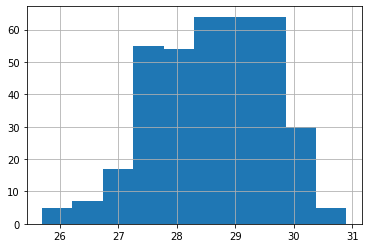

In [25]:
df["Temp"].hist()

In [27]:
df["Temp"].describe()

count    365.000000
mean      28.591644
std        0.988689
min       25.700000
25%       27.800000
50%       28.600000
75%       29.500000
max       30.900000
Name: Temp, dtype: float64

In [28]:
df["DO"].describe()

count    365.000000
mean       6.636548
std        1.482822
min        3.740000
25%        5.610000
50%        6.220000
75%        7.270000
max       11.890000
Name: DO, dtype: float64

In [29]:
df["NH4"].describe()

count    365.000000
mean       4.574110
std        4.467244
min        0.000000
25%        0.800000
50%        3.000000
75%        8.000000
max       20.000000
Name: NH4, dtype: float64